In [5]:
import model
import torch

In [6]:
from dataloader.cifar10 import CIFAR10
from torchvision import transforms
import matplotlib.pyplot as plt

In [7]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])

In [21]:
#preprocess = preprocess()
trainset = CIFAR10(root='../datasets', train=True, download=True, transform=preprocess)

Files already downloaded and verified


In [22]:
len(trainset)

50000

In [23]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

In [24]:
d = iter(trainloader)

In [27]:
d

In [25]:
image, label = d.next()

In [26]:
label

tensor([0, 5, 5, 9])

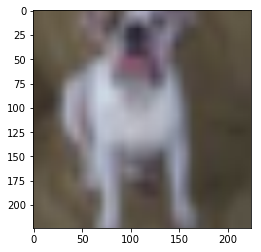

In [47]:
img = image[1]
npimg = img.numpy()
import numpy as np
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [50]:
import random

In [76]:
random.randrange(0,4)

2

In [83]:
for i in range(10):
    print(random.randrange(0,4))

1
3
1
0
3
1
1
1
3
3


In [129]:
import configparser
config = configparser.ConfigParser(allow_no_value=True)
config.read('configs/field.ini')

['configs/field.ini']

In [130]:
config.items('EXP')

[('root', ''),
 ('seed', ''),
 ('exp_name', ''),
 ('batch_size', ''),
 ('model', ''),
 ('epochs', ''),
 ('lr', ''),
 ('val_freq', ''),
 ('worker', ''),
 ('gpus', ''),
 ('unsuper', '')]

In [137]:
from CustomConfigparser import CustomConfigparser

In [138]:
CustomConfigparser('configs/filed.ini', 'configs/resnet_50.ini')

{}

In [5]:

import configparser

In [18]:
def CustomConfigparser(field, config):
    F_config = configparser.ConfigParser(allow_no_value=True)
    T_config = configparser.ConfigParser(allow_no_value=True)
    F_config.read(field)
    T_config.read(config)
    sections = F_config.sections()
    r = {}
    for section in sections:
        items = F_config.items(section)
        sub_r = {}
        for ele in items:
            try :
                sub_r[ele[0]] = T_config[section][ele[0]]
            except Exception as e:
                sub_r[ele[0]] = None
        r[section]=sub_r
    return r

In [19]:
CustomConfigparser('configs/field.ini', 'configs/resnet_50.ini')

{'EXP': {'root': '../datasets',
  'seed': '777',
  'exp_name': 'resnet_50',
  'batch_size': '128',
  'model': 'resnet',
  'epochs': '100',
  'lr': '1e-3',
  'val_freq': '1',
  'worker': '4',
  'gpus': '0',
  'unsuper': 'false'},
 'DATASET': {'dataset': None,
  'autoaug': None,
  'resize': None,
  'hflip': None,
  'rot': None},
 'MODEL': {'depth': '50',
  'optim': 'adam',
  'scheduler': 'reducelr',
  'criterion': 'crossentropy',
  'transfer': None}}

In [ ]:
if optim_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optim_name == 'rangerlars':
        optimizer = RangerLars(model.parameters(), lr=lr)
    else :
        raise ValueError('no supported optimizer name')
    
    if scheduler_name =='reducelr':
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)
    elif scheduler_name == 'cosine':
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0.)
    else :
        raise ValueError('no supported scheduler name')


In [8]:
from dataloader.fasion import SimpleImageLoader

In [9]:
fasion_dataset = SimpleImageLoader(root = '/home/jovyan/2020kaist/cs492/vision/datasets', split = 'train', transform = preprocess)

In [21]:
trainloader = torch.utils.data.DataLoader(fasion_dataset, batch_size=2, shuffle=True, num_workers=1)
d = iter(trainloader)

In [22]:
image, label = d.next()

In [23]:
label

tensor([143,  51])

In [15]:
import glob

dir =  '/home/jovyan/2020kaist/cs492/vision/datasets/images/*'

a = glob.glob(dir)
len(a)

131629